In [1]:
import numpy as np, matplotlib.pyplot as plt
import os
import Bio
from Bio import SeqIO

In [2]:
os.chdir("/home/jlparkinson1/Documents/gp_proteins/_benchmarking_xGPR/benchmark_evals/fluorescence_eval/raw_data/")
with open("wt.fasta", "r") as f1:
    true_wt = [s for s in SeqIO.parse(f1, "fasta")][0]

In [3]:
os.chdir("/home/jlparkinson1/Documents/gp_proteins/_benchmarking_xGPR/benchmark_evals/fluorescence_eval/raw_data/2b3q_a/a3m")

In [4]:
with open("bfd_uniclust_hits.a3m", "r") as f1:
    seqs = [s for s in SeqIO.parse(f1, "fasta")]
    
template = str(seqs[0].seq)
template = template[:64] + "--" + template[64:]
print(template)

MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTL--XVQCFSRYPDHMKRHDFFKSAMPEGYVQERTISFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYITADKQKNGIKANFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYKGSHHHHHH


In [5]:
clean_seqs = []
for seq in seqs:
    counter, n_added = 0, 0
    clean_seq = []
    for letter in str(seq.seq):
        if letter.upper() == letter:
            clean_seq.append(letter)
            counter += 1
        elif counter == 64 and n_added < 2:
            clean_seq.append(letter.upper())
            n_added += 1
    if n_added == 1:
        clean_seq.insert(65, "-")
    if len(clean_seq) == 244 and n_added == 0:
        clean_seq.insert(64, "-")
        clean_seq.insert(64, "-")
    clean_seqs.append("".join(clean_seq))

In [6]:
aas = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I',
       'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', '-']

In [8]:
msa = np.zeros((237,21))

for clean_seq in clean_seqs:
    for i, letter in enumerate(clean_seq[1:-8]):
        if letter in ["B", "X", "Z"]:
            continue
        msa[i,aas.index(letter)] += 1

In [15]:
pssms = []

for i in range(msa.shape[0]):
    pssm = np.zeros((21,21))
    n_pairs = msa[i,:].sum()
    n_pairs = n_pairs * (n_pairs - 1) / 2

    for j in range(msa.shape[1]):
        pssm[j,j] = 0
        for k in range(j+1, 20):
            pssm[j,k] = msa[i,j] * msa[i,k] / n_pairs
            pssm[k,j] = pssm[j,k]
    #pssm[20,20] = 1


    #pssm = (pssm - pssm.min()) / (pssm.max() - pssm.min())
    #try:
    #    pssm = np.linalg.cholesky(pssm)
    #except:
    #    import pdb
    #    pdb.set_trace()
    pssms.append(pssm)

In [16]:
pssms = np.stack(pssms)

In [18]:
pssms.argmax()

58374

In [19]:
prob_msa = msa.copy()
prob_msa = (prob_msa[:,:-1] + 1) / (prob_msa[:,:-1].sum(axis=1) + 21)[:,None]

<BarContainer object of 237 artists>

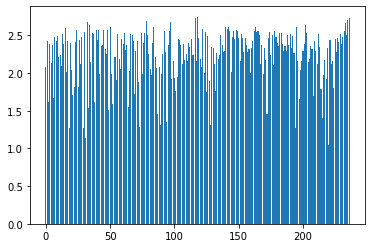

In [20]:
entropy = -np.sum(prob_msa * np.log(prob_msa), axis=1)
#entropy = 2.99573 - entropy
plt.bar(np.arange(entropy.shape[0]), entropy)

In [21]:
entropy.argmax()

118

In [24]:
wow = np.sort(msa, axis=1)

In [26]:
wow[:,-2].argmax()

31

In [27]:
msa[31,:]

array([ 21.,  38.,   2.,   9.,   3.,  19.,   9., 793.,   2.,   6.,  13.,
         6.,   3.,   7.,  12.,  22.,   8.,   4.,   1.,  27., 750.])

In [29]:
ntot = msa[31,:].sum()
n_pairs = ntot * (ntot - 1) / 2

750 * 793 / n_pairs

0.3864183453693146

In [32]:
(750*793)/((793*792)/2)

1.893939393939394